<a href="https://colab.research.google.com/github/StellaIbeh/Data_preprocessing-Assignment-/blob/main/ML_pipeline_%5BAdaobi_Stella_Ibeh%5D_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: [Diabetes Prediction Model]
## African Leadership University

## Student Name: [Adaobi Stella Ibeh]

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   **Your answer for data sources goes here **                              
   **Data Source for Intro to ML Project** :Pima Indians Diabetes Database - Kaggle
   
   **Data Sources aside from Kaggle or google**
  
   1)Early Stage Diabetes Risk Prediction Dataset: UCI Machine Learning Repository   
   2) IEEE Explore :https://ieeexplore.ieee.org/document/8940457            
   3) GTS Diabetes Analysis Dataset :https://gts.ai/dataset-download/diabetes-data-anslysis-2/#  
   4) Mendeley Datasets : https://data.mendeley.com/datasets/wj9rwkp9c2/1
   

   


   
   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

   **Data Aggregation from multiple sources is necessary for comprehensive analysis in this diabetes prediction project. By combining data from UCI, IEEE, GTS, and Mendeley, a broader range of patient demographics, clinical features, and health conditions can be captured. This diversity improves the model's ability to generalize across various patient groups and enhances predictive accuracy. Additionally, using multiple sources helps mitigate biases that may exist in individual datasets, contributing to a more balanced and reliable model capable of accurately predicting diabetes risk across different populations.**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#insert code if necessary



2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 ** Current format of the data : The Pima Indians Diabetes dataset from Kaggle is provided in CSV format. It consists of structured data, with rows representing individual patients and columns for different features related to health metrics and the target outcome.**

 ** Planned Transformation: To prepare the data for analysis, the following steps will be taken
 PLANNED TRANSFORMATION TO A UNIFIED FORMAT

To prepare the dataset for analysis and modeling, the following transformations will be applied:

i. Standardize Data Types: Ensure numerical columns are correctly formatted as floats or integers.            
ii. Handle Missing Values: Impute missing values using mean/median values to prevent bias.                     
iii. Normalize Features: Scale numerical features to a [0, 1] range for consistency and model compatibility.               
iv. Feature Selection: Remove redundant or irrelevant features using statistical methods.       
vi. Outlier Detection: Identify and handle outliers using Z-scores or IQR to improve model accuracy.


3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   FEATURES IN THE DATASET

The diabetes prediction dataset includes the following features:

Pregnancies: Number of times the patient has been pregnant.
Glucose: Plasma glucose concentration (mg/dL) measured after a glucose tolerance test.
Blood Pressure: Diastolic blood pressure (mm Hg).
Skin Thickness: Triceps skinfold thickness (mm).
Insulin: 2-hour serum insulin (mu U/ml).
BMI: Body mass index, calculated as weight (kg) / (height (m))^2.
Diabetes Pedigree Function: A function indicating the genetic predisposition to diabetes.
Age: Age of the patient (years).
Outcome: Binary variable (0 or 1), indicating whether the patient has diabetes (1) or not (0).
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
The exploratory data analysis (EDA) process for the diabetes dataset involves:

i)Class Distribution: Assessing the balance between diabetic and non-diabetic cases to determine if data imbalance solutions, like oversampling, are needed.     
ii)Feature Distributions: Using histograms and density plots to understand the skewness and variability in features such as glucose levels and BMI.                
iii)Correlations: Creating a heatmap to visualize relationships between features, highlighting potential multicollinearity issues.                               
iv)Outliers: Detecting outliers with box plots and the interquartile range (IQR) method, focusing on features like insulin and blood pressure that could impact analysis or model training.                             
   SUMMARY OF THE EDA

. The dataset has a mix of normally distributed and skewed features.                                        
. There are potential outliers in features such as Insulin and Skin Thickness.                                                        
. The Outcome variable shows an imbalance that may need addressing to prevent bias in model predictions.                 
. Some features, such as Glucose and BMI, show strong positive correlations with the Outcome, indicating their potential significance in diabetes prediction.
   
  **Insert code for data exploration below**


In [ ]:
#insert code for data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

# Display the basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


The dataset contains 768 entries.
There are 9 columns with the following data types:       
2 float columns (BMI, DiabetesPedigreeFunction)         
7 integer columns (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age, Outcome)    
No categorical variables are present, so encoding is not necessary for this dataset before modeling.

In [ ]:
#lets check for missing value
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of Duplicates:", duplicates)


Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Number of Duplicates: 0


In [ ]:
# Summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

The dataset contains 768 entries with 9 features, including various health indicators like glucose levels, blood pressure, BMI, and insulin levels. The features show varying degrees of central tendency and spread, with notable skewness in some variables (e.g., insulin, skin thickness). Outliers and missing data (indicated by zeros in certain features) should be addressed during preprocessing to improve model performance. The target variable, Outcome, indicates a binary classification task (diabetes or no diabetes).

In [ ]:
#Include plots for EDA
#checking class distribution
class_distribution = df['Outcome'].value_counts()
print("Class Distribution:")
print(class_distribution)




Class Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


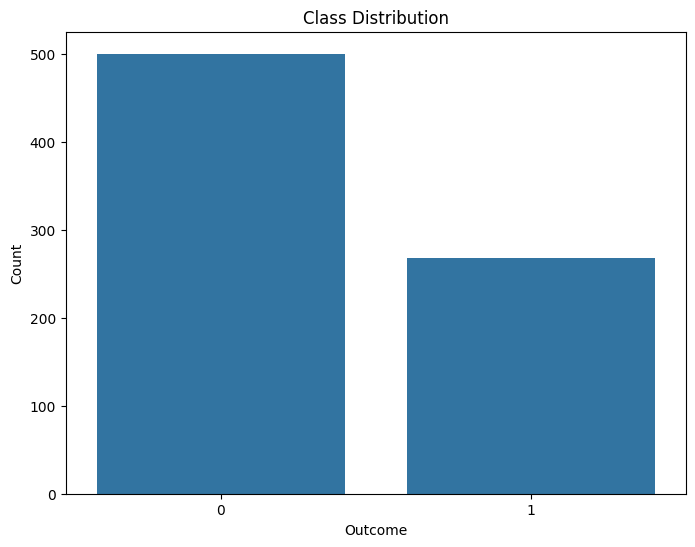

In [ ]:
#plotting class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()



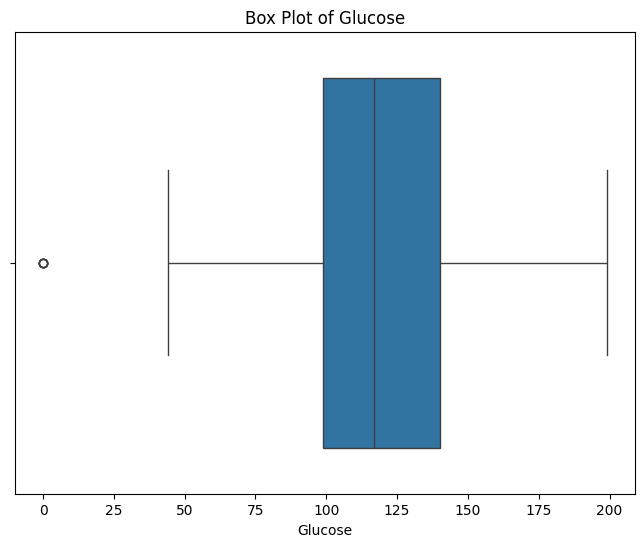

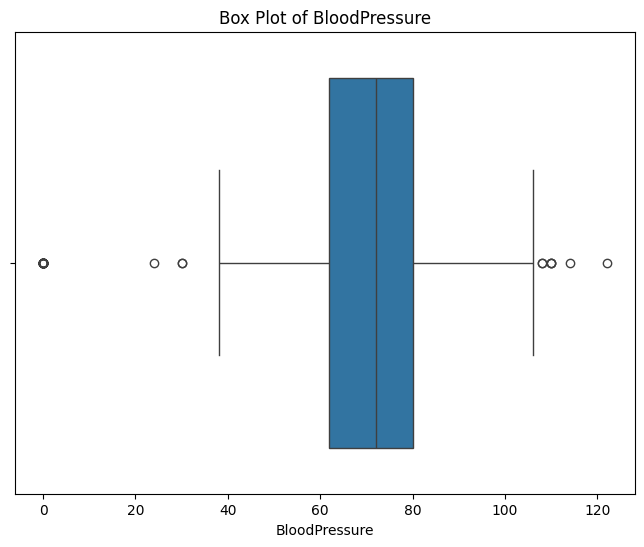

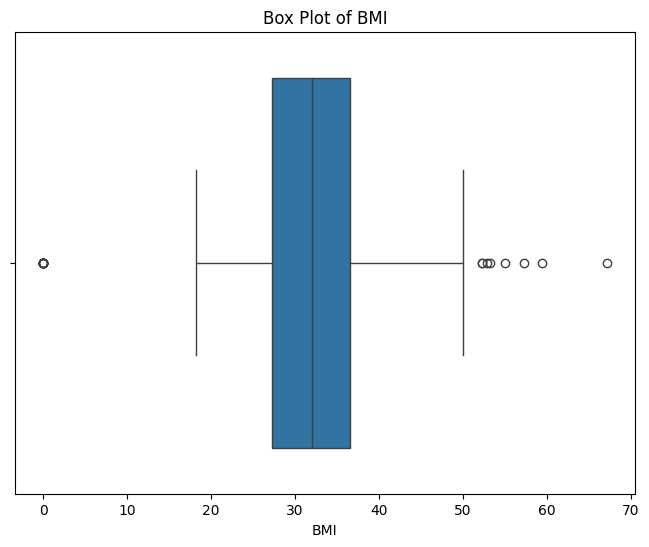

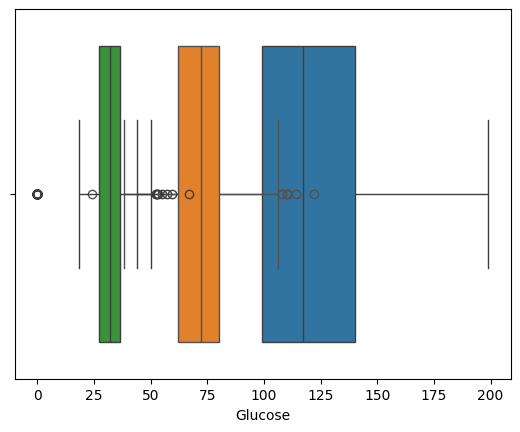

In [ ]:
# Outlier detection
for feature in ['Glucose', 'BloodPressure', 'BMI']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


<Figure size 1400x800 with 0 Axes>

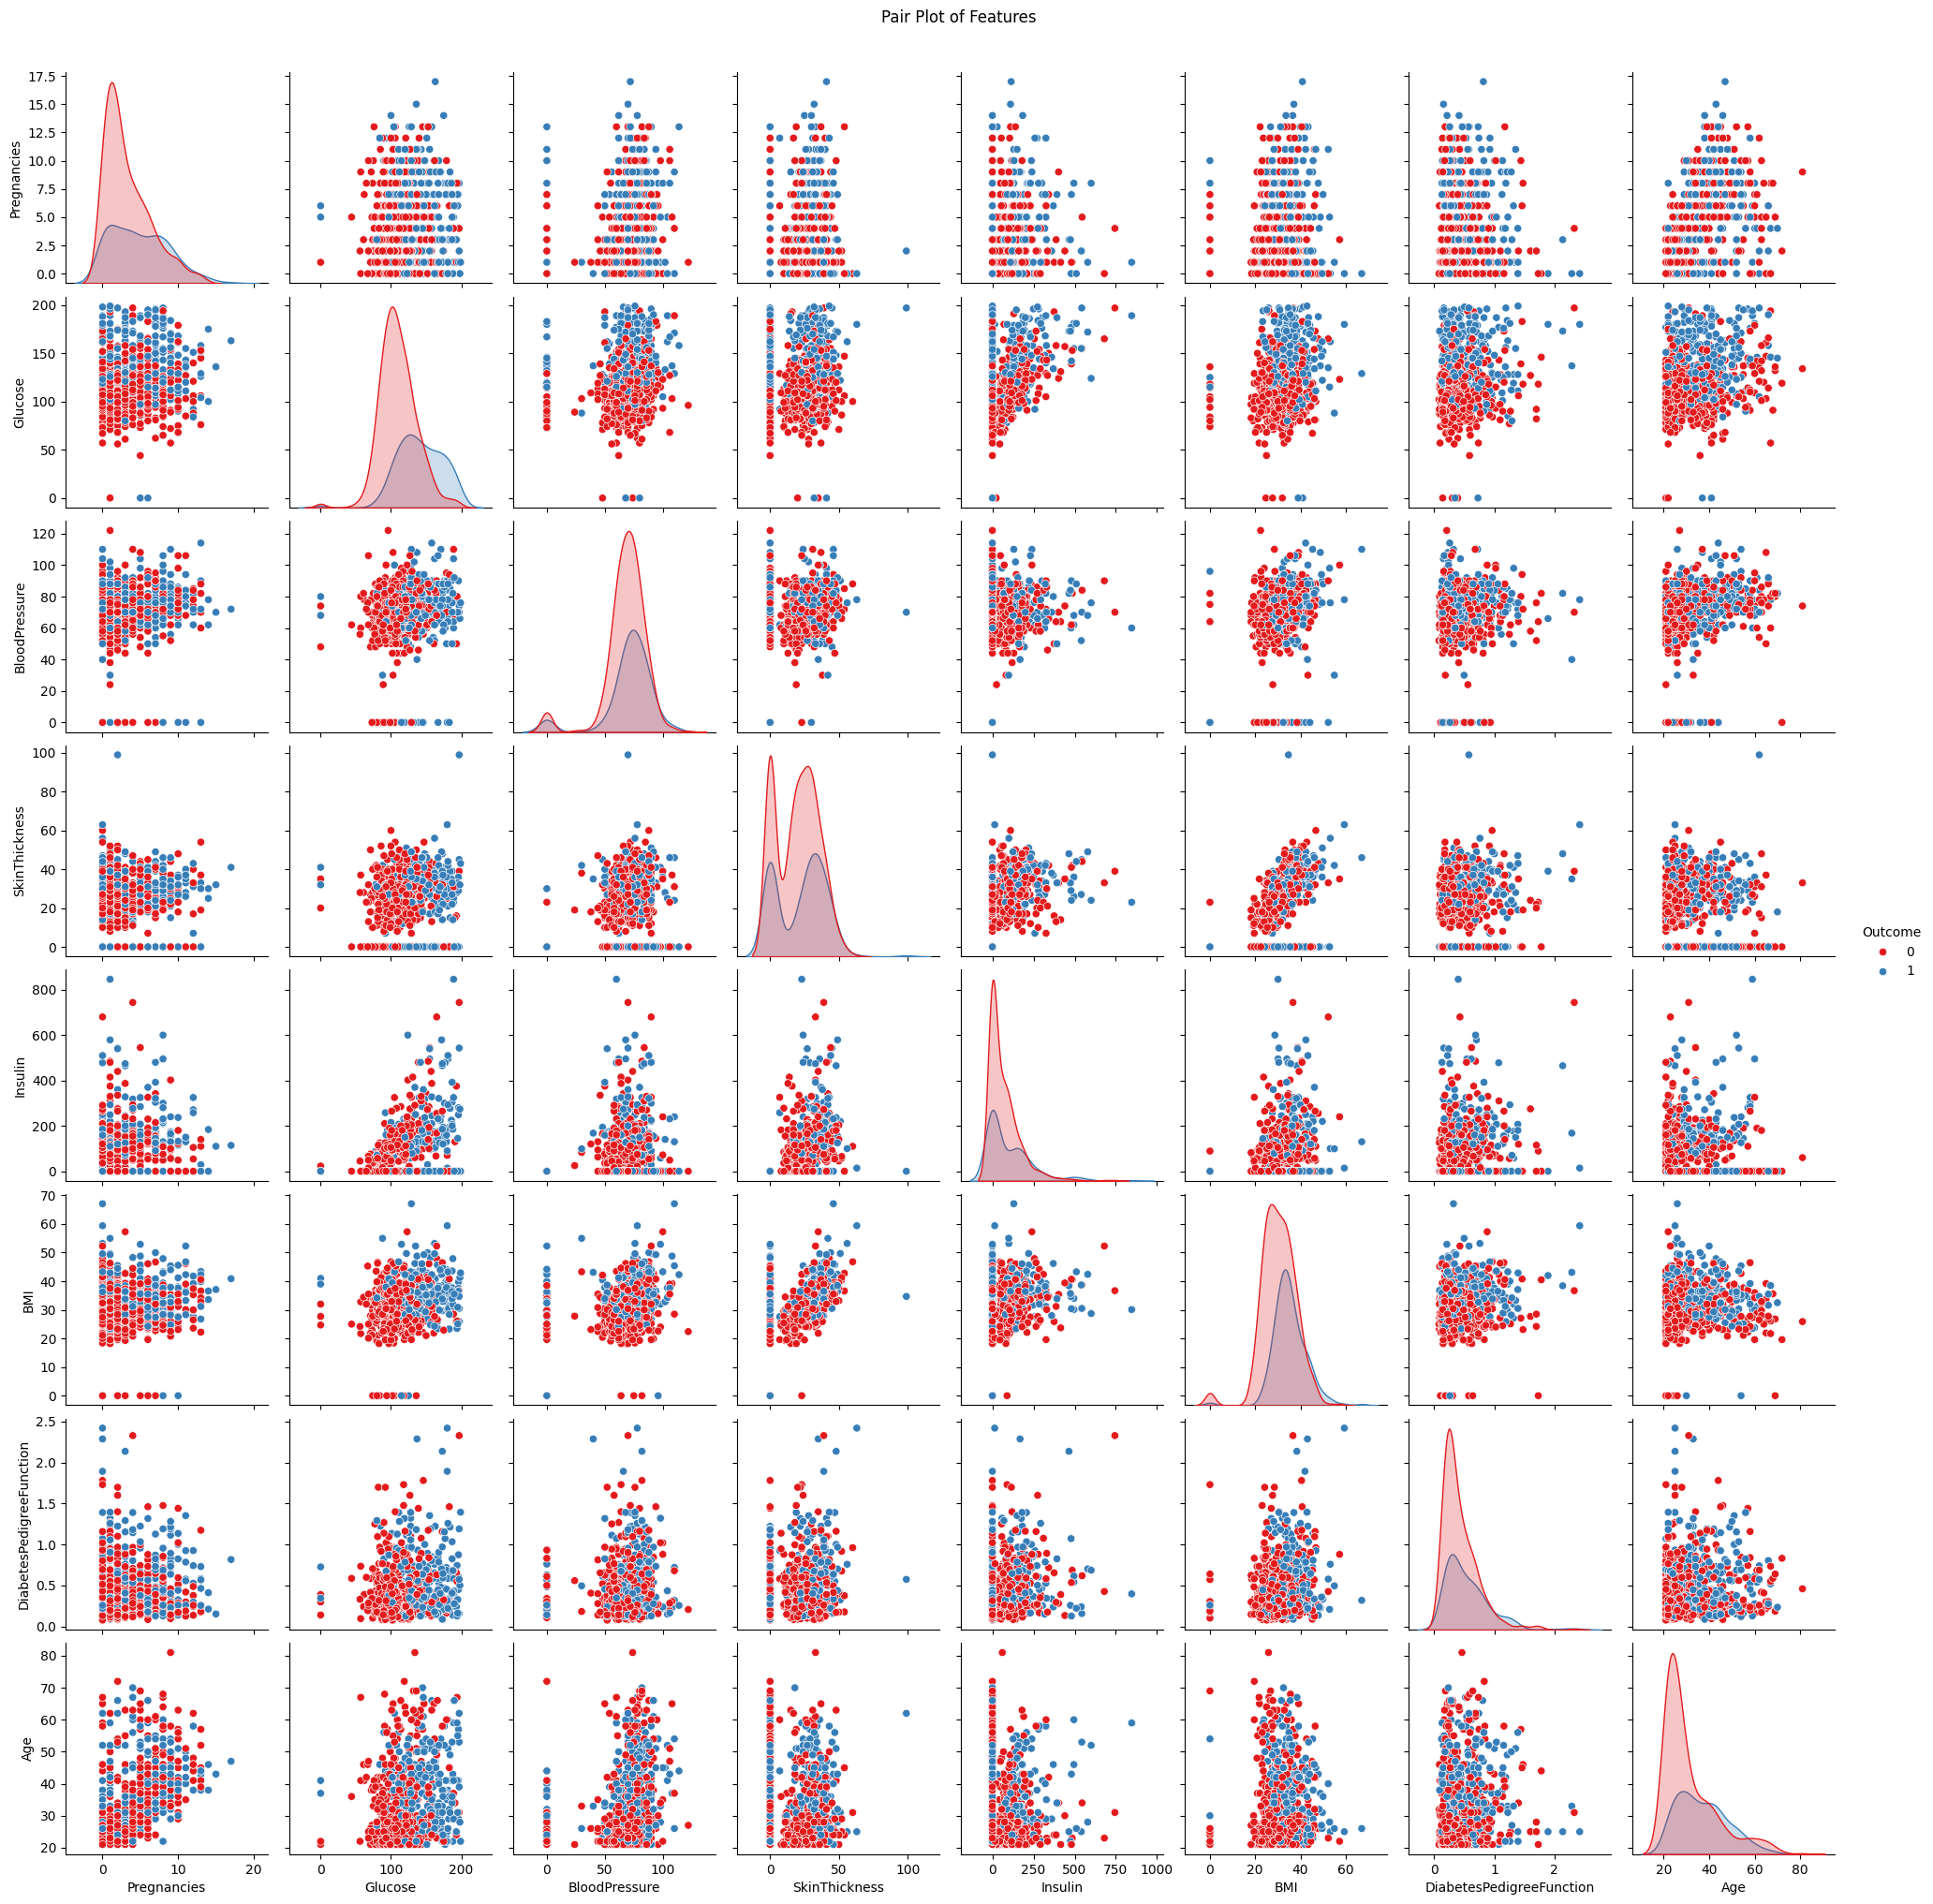

In [ ]:


#pair plot
plt.figure(figsize=(14, 8))
sns.pairplot(df, hue='Outcome', palette='Set1', diag_kind='kde')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()




4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   Preexisting Hypotheses:

A. Hypothesis 1: There is a significant relationship between high glucose levels and the likelihood of being diagnosed with diabetes.                          
B.Hypothesis 2: BMI is positively correlated with the risk of developing diabetes.

C.Hypothesis 3: Age is positively correlated with the likelihood of having diabetes.
 **Methodologies to empirically test the hypothesis**

i. Independent Samples t-test (for comparing means between two groups).

ii.Pearson Correlation (for measuring linear relationships between continuous variables).

iii.Logistic Regression (for modeling binary outcomes and assessing the influence of continuous predictors like age).

iv.Chi-Square Test for Independence (for testing relationships between categorical variables like age groups and diabetes).

5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.
    

  Density of the data :The Dataset does not have missing values, the presence of zero values in certain columns will  be examined further to determine whether they are true data points or should be handled as missing values.

  Strategies to handle missing data while maintaining dataset integrity

  Strategies to Handle Missing Data:
Although the dataset doesn't contain missing values, you might encounter missing data in similar datasets. Here are the typical strategies to handle missing data:
i. Imputation: Replace missing values with the mean, median, or mode of the column. The median is often preferred for numerical data as it's more robust to outliers.


ii.Deletion: Remove rows with missing values, but only if the percentage of missing data is minimal and won’t significantly impact model performance.

iii.Forward/Backward Fill: In time-series data, missing values can be filled with the next or previous valid value, depending on the context

**Outliers: Detect and handle outliers using the IQR or Z-score method. Capping extreme values at a defined threshold is a common approach.**                       
**Data Integrity: Ensure that imputation and outlier handling do not distort the underlying data distribution, preserving its relevance for the model.**
   **Insert code for Handling Sparse/Dense Data and Outliers below**

6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    **Your answer for Hypothesis Testing goes here **



8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

 **Your answer for features must be plotted/ show your working code-wise **
9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   [**insert text for preprocessing steps**]


In [ ]:
#print out relevant features


10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.